# Heart Disease Analysis - Classification

Given clinical parameters of a patient, we have to predict whether or not they have heart disease

## About the data

1. age (Age in years)


2. sex : (1 = male, 0 = female)


3. cp (Chest Pain Type): [1: Typical Angina, 2: Atypical Angina, 3: Non-Anginal Pain, 4: Asymptomatic]


4. trestbps (Resting Blood Pressure in mm/hg )


5. chol (Serum Cholesterol in mg/dl)


6. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]


7. restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy]


8. thalach (maximum heart rate achieved)


9. exang (Exercise Induced Angina): [1 = yes, 0 = no]


10. oldpeak (ST depression induced by exercise relative to rest)


11. slope (the slope of the peak exercise ST segment)


12. ca [number of major vessels (0–3)]


13. thal (Thallium heart scan): [3 = normal, 6 = fixed defect, 7 = reversible defect]


14. target: [0 = no disease, 1 = disease]

#### Importing the dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\User\Desktop\Projects\heartdisease_data.csv')
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


Since the variable names are very ambigious, hence it is necessary to alter the names 

In [2]:
df.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
            'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target']

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


The data is very baffling and contains '?' as data which is not acceptable, hence it needs to be replaced with NaN.

In [4]:
for i in df.columns:
    df[i]=df[i].replace('?',np.NaN)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0


#### Checking if data has correct datatypes

In [5]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

#### It can be seen that the variables types are
 
- Binary: sex, fbs, exang, target
- Categorical: cp, restecg, slope, ca, thal
- Continuous: age, trestbps, chol, thalac, oldpeak


Note here that the binary and categorical variable are classified as different integer type by python. We will need to change these.

This ambiguity needs to be treated

#### change the categorical type to categorical variables

In [6]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['target'] = df['target'].astype('object')

df.dtypes

age          int64
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target      object
dtype: object

Now the numerical type need to converted to numerical type, however we cannot do so becuase the data has null values.
- the null values need to be treated first

#### Checking for null values

In [7]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
target        0
dtype: int64

- The variable 'ca' has almost 98% null data, hence it seems appropriate to drop this variable.


- The variable 'thal' has almost 82% null data, hence it seems appropriate to drop this variable.

In [8]:
df.drop(['ca','thal'], axis=1, inplace=True)

#### Imputing the null values in categorical variables

In [9]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

df['fbs']=imp.fit_transform(df['fbs'].values.reshape(-1,1))
df['exang']=imp.fit_transform(df['exang'].values.reshape(-1,1))
#df['slope']=imp.fit_transform(df['slope'].values.reshape(-1,1))
#df['thal']=imp.fit_transform(df['thal'].values.reshape(-1,1))

#### Imputing the null values in numerical variables

In [10]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

df['trestbps']=imp.fit_transform(df['trestbps'].values.reshape(-1,1))
df['chol']=imp.fit_transform(df['chol'].values.reshape(-1,1))
df['thalach']=imp.fit_transform(df['thalach'].values.reshape(-1,1))
df['oldpeak']=imp.fit_transform(df['oldpeak'].values.reshape(-1,1))

In [11]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       102
target        0
dtype: int64

We can see that all the null values have been treated

#### change the numerical type to numerical variables

In [12]:
df['trestbps'] = df['trestbps'].astype('int')
df['chol'] = df['chol'].astype('int')
df['thalach'] = df['thalach'].astype('int')
df['oldpeak'] = df['oldpeak'].astype('int')

df.dtypes

age          int64
sex         object
cp          object
trestbps     int32
chol         int32
fbs         object
restecg     object
thalach      int32
exang       object
oldpeak      int32
slope       object
target      object
dtype: object

All the variables are now correctly labelled

#### Checking for unique variables

In [13]:
df.nunique()

age          39
sex           2
cp            4
trestbps     41
chol        100
fbs           2
restecg       3
thalach      59
exang         2
oldpeak       5
slope         3
target        5
dtype: int64

We can see that the target variable has 5 unique values however it is clear that the target is only to predict if the entry is prone to a heartDisease or not, hence it is safe to label the target variable into 2 categories

In [14]:
df['target']=df['target'].replace(0, 'Healthy')

In [15]:
df['target']=df['target'].replace(1, 'At_risk')

In [16]:
df['target']=df['target'].replace(2, 'At_risk')

In [17]:
df['target']=df['target'].replace(3, 'At_risk')

In [18]:
df['target']=df['target'].replace(4, 'At_risk')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,44,1,4,130,209,0,1,127,0,0,NaN,Healthy
1,60,1,4,132,218,0,1,140,1,1,3,At_risk
2,55,1,4,142,228,0,1,149,1,2,1,At_risk
3,66,1,3,110,213,1,2,99,1,1,2,Healthy
4,66,1,3,120,0,0,1,120,0,0,1,Healthy


It is clear that the data is clean and EDA can be performed

In [20]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,133.517588,178.311558,122.638191,1.115578
std,7.827080,18.301031,112.144808,18.871435,0.922069
min,35.000000,0.000000,0.000000,69.000000,0.000000
25%,55.000000,125.500000,119.500000,112.000000,1.000000
50%,60.000000,133.000000,214.000000,122.000000,1.000000
75%,64.000000,140.000000,254.000000,130.000000,2.000000
max,77.000000,190.000000,458.000000,180.000000,4.000000


- The data consits of 199 data entries


- The column does not consist of any null values


- The column 'chol' is highly susceptable of consisting outliers, considering the high difference between 75 percentile and max value


- The column 'age', 'trestbps' and 'thalach' are normally distributed


- The columns 'chol' is right skewed.

In [21]:
df.describe(include=['O'])

,sex,cp,fbs,restecg,exang,slope,target
count,199,199,199,199,199,97,199
unique,2,4,2,3,2,3,2
top,1,4,0,1,1,2,At_risk
freq,193,130,131,92,147,52,148


From the data we can see conclude that 
- The data consits of majority male entries almost i.e 96%  


- Most entries in the data are asymptotic of chest pain i.e 65%


- Most data entries have Fasting Blood Sugar Level of > 120mg/d i.e 66%


- Most data entries have Excercise Induced Angina i.e 73%

# EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

#### Vizualizing categorical variables

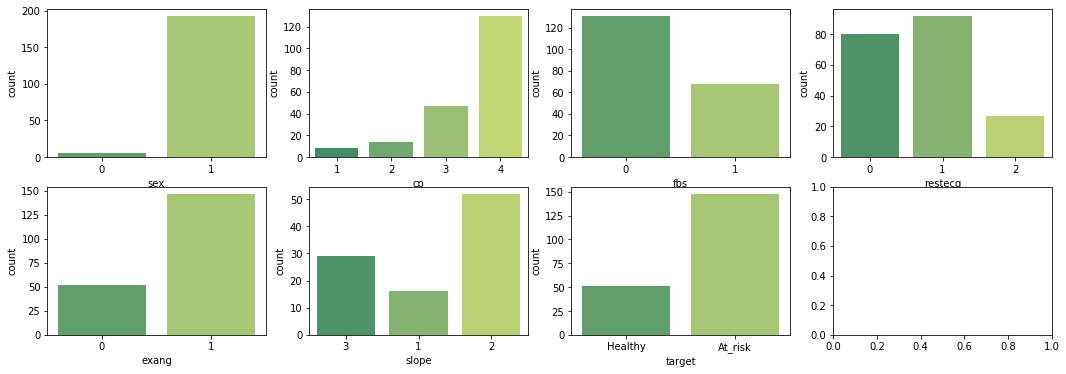

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(18, 6))

sns.countplot(ax=axes[0, 0], x=df['sex'], palette='summer')
sns.countplot(ax=axes[0, 1], x=df['cp'], palette='summer')
sns.countplot(ax=axes[0, 2], x=df['fbs'], palette='summer')
sns.countplot(ax=axes[0, 3], x=df['restecg'], palette='summer')
sns.countplot(ax=axes[1, 0], x=df['exang'], palette='summer')
sns.countplot(ax=axes[1, 1], x=df['slope'], palette='summer')
#sns.countplot(ax=axes[1, 2], x=df['thal'], palette='summer')
sns.countplot(ax=axes[1, 2], x=df['target'], palette='summer')

- The number of males in this dataset is extremly high in the data, making the data extremly skewed and imbalanced and hence it should be dropped.


- Most entries in the data are asymptotic of chest pain


- Most data entries have Excercise Induced Angina 


- Most data entries are at a high risk of heart disease than those that are healthy


- Slope variable also displays high imbalance in the data, which hinder's the model's ability to predict accurately.

In [24]:
df.drop(['sex', 'slope'], axis=1, inplace=True)

#### Comparing categorical data

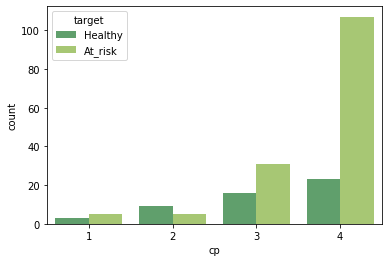

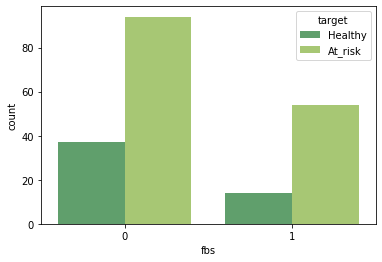

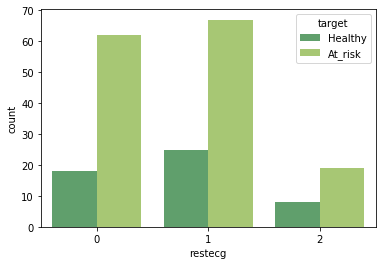

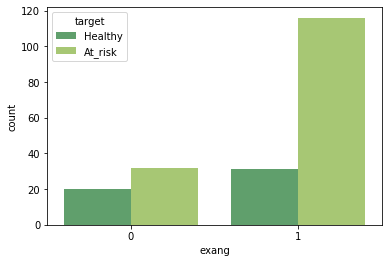

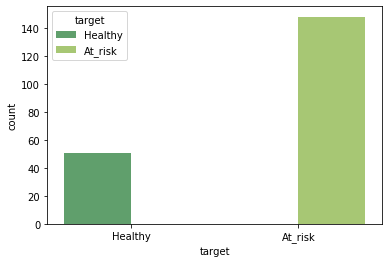

In [25]:
df_1 = df[['cp','fbs','restecg','exang','target']]
for i in df_1.columns:
    sns.countplot(x=i, hue="target", data=df_1, palette ='summer')
    plt.show()

- An individual with asymptotic chest pain also posseses a high risk of heart disease, and asymptotic doesn't mean healthy.


- However an Anginia doesn't necesserily mean a probable high risk of heart disease.


- Individuals with a blood sugar level less than 120 indicate a probable high risk of heart disease.


- A high Blood Pressure conginally doesn't mean a probable high risk of heart disease. 


- Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality 


- Angina induced while excercise is a probable indication of heart disease

#### Vizualizing Numerical Variables

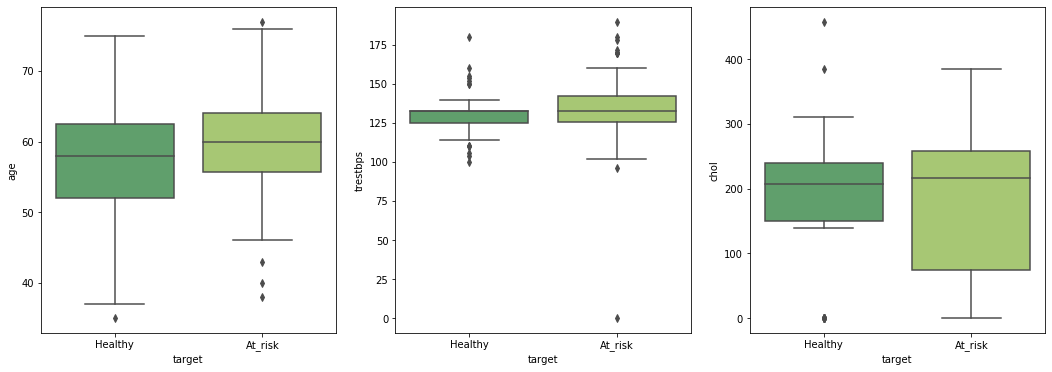

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], x=df['target'],y=df['age'], palette='summer')
sns.boxplot(ax=axes[1], x=df['target'],y=df['trestbps'], palette='summer')
sns.boxplot(ax=axes[2], x=df['target'],y=df['chol'], palette='summer')

- The age of patient doesn't necessarily influence on diagnosis of heart disease.


- Resting Blood Pressure has a great affect on diagnosis of heart disease.


- Serum cholestrol levels play a vital role in determining the diagnosis of heart disease.

#### Vizualizing Numerical Data

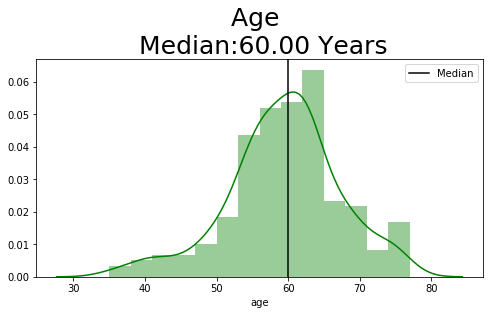

In [27]:
plt.subplots(figsize=(8,4))
sns.distplot(df['age'],color='green')
plt.title('Age \n Median:{0:.2f} Years'.format(df['age'].median()),size=25)
plt.axvline(df['age'].median(),color='black',label='Median')
plt.legend()

Age appears to follow a normal distribution.

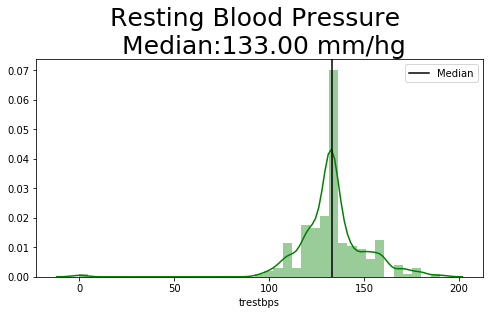

In [28]:
plt.subplots(figsize=(8,4))
sns.distplot(df['trestbps'],color='green')
plt.title('Resting Blood Pressure \n Median:{0:.2f} mm/hg'.format(df['trestbps'].median()),size=25)
plt.axvline(df['trestbps'].median(),color='black',label='Median')
plt.legend()

Resting blood pressure appears to follow a normal distribution.

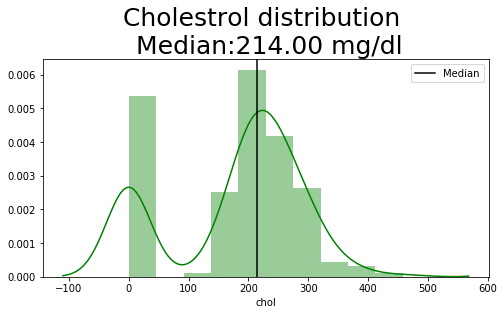

In [29]:
plt.subplots(figsize=(8,4))
sns.distplot(df['chol'],color='green')
plt.title('Cholestrol distribution \n Median:{0:.2f} mg/dl'.format(df['chol'].median()),size=25)
plt.axvline(df['chol'].median(),color='black',label='Median')
plt.legend()

Apparently is quite close to a normal distribution. However it is possible to notice a high value (acmia of 500) that can be a possible outlier!

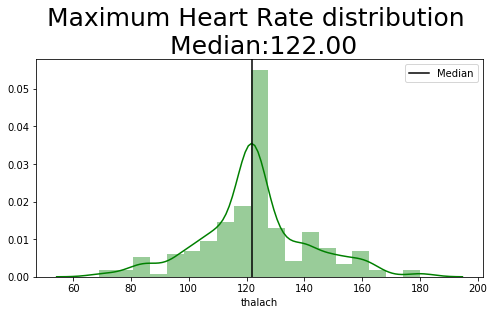

In [30]:
plt.subplots(figsize=(8,4))
sns.distplot(df['thalach'],color='green')
plt.title('Maximum Heart Rate distribution \n Median:{0:.2f}'.format(df['thalach'].median()),size=25)
plt.axvline(df['thalach'].median(),color='black',label='Median')
plt.legend()

Thalach: the maximum heart rate achieved seems to follow a right-skewed distribution

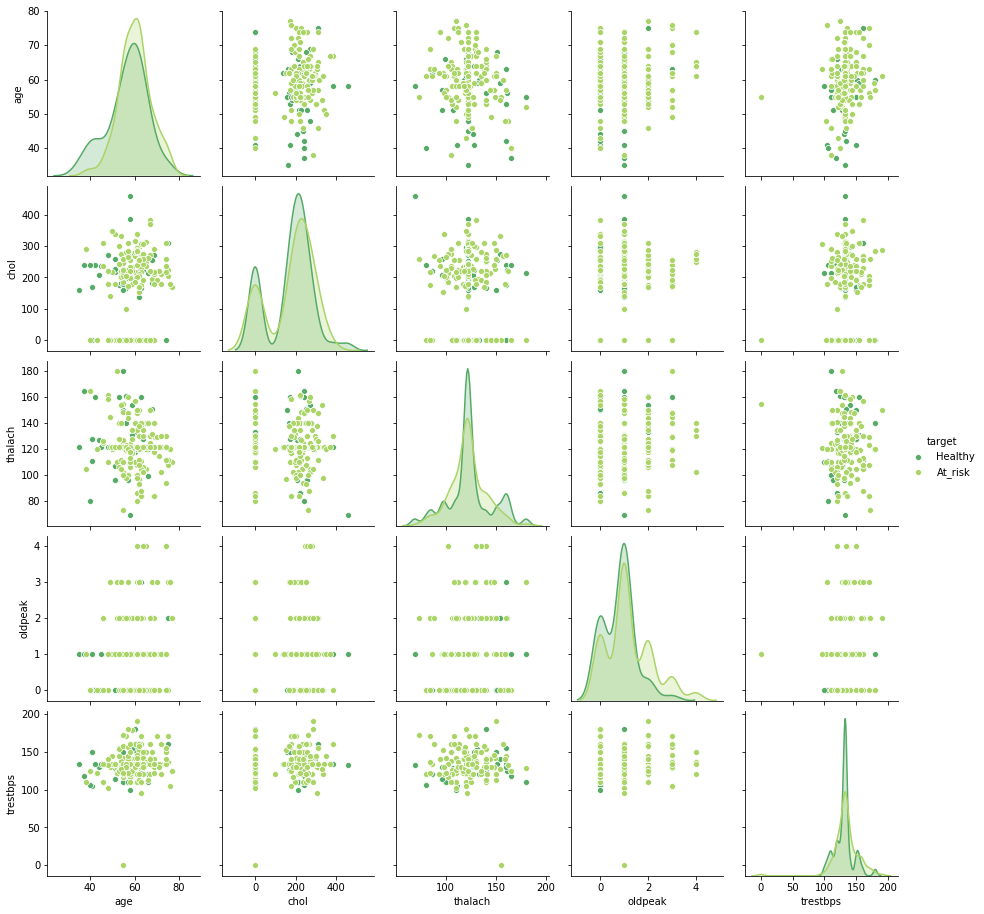

In [31]:
# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(df[continous_features + ['target']], hue='target', palette='summer')

- oldpeak having a linear separation relation between Healthy and At-Risk.


- thalach having a mild separation relation between Healthy and At-Risk.


- Other features don’t form any clear separation

# Feature Engineering

#### Checking for outliers

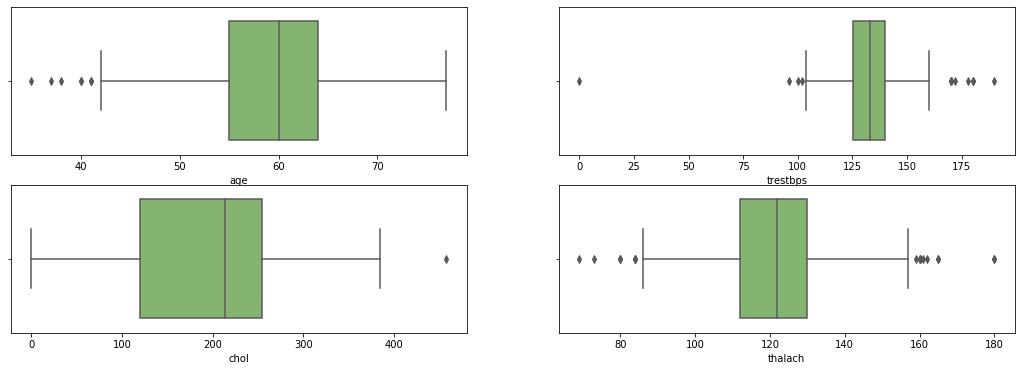

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(18, 6))

sns.boxplot(ax=axes[0, 0], x=df['age'], palette='summer')
sns.boxplot(ax=axes[0, 1], x=df['trestbps'], palette='summer')
sns.boxplot(ax=axes[1, 0], x=df['chol'], palette='summer')
sns.boxplot(ax=axes[1, 1], x=df['thalach'], palette='summer')

It is visible that there are outlier's in the data

#### Treating the outliers

In [33]:
import warnings
warnings.filterwarnings('ignore')

We replace the outlier's with NaN and then impute them with mean value 

In [34]:
#for value in colname:
q1 = df['age'].quantile(0.25) #first quartile value
q3 = df['age'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range 

df_include = df.loc[(df['age'] >= low) & \
                                (df['age'] <= high)] # meeting the acceptable range
df_exclude = df.loc[(df['age'] < low) | \
                               (df['age'] > high)] # not meeting the acceptable range
print(df_include.shape, df_exclude.shape)
age_replace=(np.NaN)
print(age_replace)

#imputing outlier values with NaN
df_exclude.age=age_replace

#getting back the original shape of df
df = pd.concat([df_include,df_exclude]) #concatenating both dfs to get the original shape
print(df.shape)

(192, 10) (7, 10)
nan
(199, 10)


In [35]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_include = df.loc[(df['trestbps'] >= low) & \
                                (df['trestbps'] <= high)] 
df_exclude = df.loc[(df['trestbps'] < low) | \
                               (df['trestbps'] > high)] 
print(df_include.shape, df_exclude.shape)
trestbps_replace=(np.NaN)
print(trestbps_replace)

df_exclude.trestbps=trestbps_replace

df = pd.concat([df_include,df_exclude]) 
print(df.shape)

(186, 10) (13, 10)
nan
(199, 10)


In [36]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_include = df.loc[(df['chol'] >= low) & \
                                (df['chol'] <= high)] 
df_exclude = df.loc[(df['chol'] < low) | \
                               (df['chol'] > high)] 
print(df_include.shape, df_exclude.shape)
chol_replace=(np.NaN)
print(chol_replace)

df_exclude.chol=chol_replace

df = pd.concat([df_include,df_exclude]) 
print(df.shape)

(198, 10) (1, 10)
nan
(199, 10)


In [37]:
q1 = df['thalach'].quantile(0.25)
q3 = df['thalach'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_include = df.loc[(df['thalach'] >= low) & \
                                (df['thalach'] <= high)] 
df_exclude = df.loc[(df['thalach'] < low) | \
                               (df['thalach'] > high)] 
print(df_include.shape, df_exclude.shape)
thalach_replace=(np.NaN)
print(thalach_replace)

df_exclude.thalach=thalach_replace

df = pd.concat([df_include,df_exclude]) 
print(df.shape)

(181, 10) (18, 10)
nan
(199, 10)


In [38]:
q1 = df['oldpeak'].quantile(0.25)
q3 = df['oldpeak'].quantile(0.75) 
iqr = q3-q1 
low  = q1-1.5*iqr 
high = q3+1.5*iqr 
df_include = df.loc[(df['oldpeak'] >= low) & \
                                (df['oldpeak'] <= high)] 
df_exclude = df.loc[(df['oldpeak'] < low) | \
                               (df['oldpeak'] > high)] 
print(df_include.shape, df_exclude.shape)
oldpeak_replace=(np.NaN)
print(oldpeak_replace)

df_exclude.oldpeak=oldpeak_replace

df = pd.concat([df_include,df_exclude]) 
print(df.shape)

(195, 10) (4, 10)
nan
(199, 10)


In [39]:
df.isnull().sum()

age          7
cp           0
trestbps    13
chol         1
fbs          0
restecg      0
thalach     18
exang        0
oldpeak      4
target       0
dtype: int64

#### Imputing null values with mean 

In [40]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

df['age']=imp.fit_transform(df['age'].values.reshape(-1,1))
df['trestbps']=imp.fit_transform(df['trestbps'].values.reshape(-1,1))
df['chol']=imp.fit_transform(df['chol'].values.reshape(-1,1))
df['thalach']=imp.fit_transform(df['thalach'].values.reshape(-1,1))
df['oldpeak']=imp.fit_transform(df['oldpeak'].values.reshape(-1,1))

In [41]:
df.isnull().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

All values have been imputed and outliers are treated

In [42]:
df.dtypes

age         float64
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
target       object
dtype: object

After treatment the dtypes have changed to float dtypes, which need to be changed back.

In [43]:
df['trestbps'] = df['trestbps'].astype('int')
df['chol'] = df['chol'].astype('int')
df['thalach'] = df['thalach'].astype('int')
df['age'] = df['age'].astype('int')
df['oldpeak'] = df['oldpeak'].astype('int')
df.dtypes

age          int32
cp          object
trestbps     int32
chol         int32
fbs         object
restecg     object
thalach      int32
exang       object
oldpeak      int32
target      object
dtype: object

#### Encoding the data

In [44]:
dummy_col = [column for column in df.drop(['target','oldpeak'], axis=1).columns if df[column].nunique() < 20]
data = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='int32')

In [45]:
pd.options.display.max_columns = None
data.head()

,age,trestbps,chol,thalach,oldpeak,target,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1
0,44,130,209,127,0,Healthy,0,0,1,0,1,0,0
1,60,132,218,140,1,At_risk,0,0,1,0,1,0,1
2,55,142,228,149,2,At_risk,0,0,1,0,1,0,1
3,66,110,213,99,1,Healthy,0,1,0,1,0,1,1
4,66,120,0,120,0,Healthy,0,1,0,0,1,0,0


In [46]:
data.shape, df.shape

((199, 13), (199, 10))

#### Label Encoding the Target Variable

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data['target'])

## Correlation

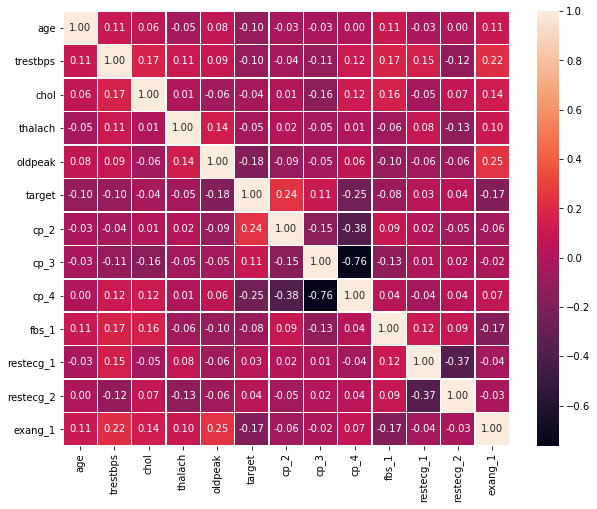

In [48]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot= True, linewidths=0.5, linecolor="white", fmt= '.2f')

- ‘cp’ shows good positive correlation with target.


- ‘oldpeak’, ‘exang’ and ‘age’ show a good negative correlation with target.


- ‘cp_4’ and ‘cp_4’ behave very negatively with each other and thus either of the variables need to be dropped.


- We will drop ‘cp_4’ as it poses a very high data hence it is better to drop it to make the data less imbalanced.

In [49]:
# Dropping the column
data.drop(['cp_4'], axis=1, inplace=True)

#### Shuffling the data before splitting

In [50]:
data = data.sample(frac = 1, random_state=0)

#### Splitting the data

In [51]:
x = data.drop(columns=['target'])
y = data[['target']]

#### Scaling the data

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Training Phase

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=47)

In [54]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(train_x, train_y)
pred = lg.predict(test_x)
log = accuracy_score(test_y,pred)*100

print('accuracy score:', log)
print('\n')
print (confusion_matrix(test_y,pred))
print('\n')
print (classification_report(test_y,pred))

accuracy score: 75.0


[[30  2]
 [ 9  3]]


              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.60      0.25      0.35        12

    accuracy                           0.75        44
   macro avg       0.68      0.59      0.60        44
weighted avg       0.72      0.75      0.71        44



## Gaussian Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x,train_y)
predgnb= gnb.predict(test_x)
gaussian = accuracy_score(test_y,predgnb)*100

print('accuracy score:',gaussian)
print('\n')
print(confusion_matrix(test_y, predgnb))
print('\n')
print(classification_report(test_y, predgnb))

accuracy score: 77.27272727272727


[[31  1]
 [ 9  3]]


              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.75      0.25      0.38        12

    accuracy                           0.77        44
   macro avg       0.76      0.61      0.62        44
weighted avg       0.77      0.77      0.73        44



## SVM 

In [57]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
svcs = accuracy_score(test_y, predsvc)*100

print('accuracy score:',svcs)
print('\n')
print(confusion_matrix(test_y, predsvc))
print('\n')
print(classification_report(test_y, predsvc))

accuracy score: 75.0


[[32  0]
 [11  1]]


              precision    recall  f1-score   support

           0       0.74      1.00      0.85        32
           1       1.00      0.08      0.15        12

    accuracy                           0.75        44
   macro avg       0.87      0.54      0.50        44
weighted avg       0.81      0.75      0.66        44



## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
decision_e = accuracy_score(test_y, preddtc)*100

print('accuracy score:',decision_e )
print('\n')
print(confusion_matrix(test_y, preddtc))
print('\n')
print(classification_report(test_y, preddtc))

accuracy score: 56.81818181818182


[[23  9]
 [10  2]]


              precision    recall  f1-score   support

           0       0.70      0.72      0.71        32
           1       0.18      0.17      0.17        12

    accuracy                           0.57        44
   macro avg       0.44      0.44      0.44        44
weighted avg       0.56      0.57      0.56        44



## RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0) 
rf.fit(train_x,train_y)
predrf = rf.predict(test_x)
random = accuracy_score(test_y,predrf)*100

print('accuracy score:',random)
print('\n')
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

accuracy score: 77.27272727272727


[[32  0]
 [10  2]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.17      0.29        12

    accuracy                           0.77        44
   macro avg       0.88      0.58      0.58        44
weighted avg       0.83      0.77      0.71        44



## KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn.score(train_x,train_y)
predknn = knn.predict(test_x)
knn_a = accuracy_score(test_y, predknn)*100

print('accuracy score:',knn_a)
print('\n')
print(confusion_matrix(test_y, predknn))
print('\n')
print(classification_report(test_y, predknn))

accuracy score: 77.27272727272727


[[31  1]
 [ 9  3]]


              precision    recall  f1-score   support

           0       0.78      0.97      0.86        32
           1       0.75      0.25      0.38        12

    accuracy                           0.77        44
   macro avg       0.76      0.61      0.62        44
weighted avg       0.77      0.77      0.73        44



## GradientBoost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier(random_state=0)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)
predgbr = gbr.predict(test_x)
gbr_a = accuracy_score(test_y, predgbr)*100

print('accuracy score:',gbr_a)
print('\n')
print(confusion_matrix(test_y, predgbr))
print('\n')
print(classification_report(test_y, predgbr))

accuracy score: 70.45454545454545


[[29  3]
 [10  2]]


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        32
           1       0.40      0.17      0.24        12

    accuracy                           0.70        44
   macro avg       0.57      0.54      0.53        44
weighted avg       0.65      0.70      0.66        44



## ExtraaTree

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
reg = ExtraTreesClassifier()
reg.fit(train_x, train_y)
reg.score(train_x,train_y)
predreg = reg.predict(test_x)
reg_a = accuracy_score(test_y, predreg)*100

print('accuracy score:',reg_a)
print('\n')
print(confusion_matrix(test_y, predreg))
print('\n')
print(classification_report(test_y, predreg))

accuracy score: 77.27272727272727


[[32  0]
 [10  2]]


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        32
           1       1.00      0.17      0.29        12

    accuracy                           0.77        44
   macro avg       0.88      0.58      0.58        44
weighted avg       0.83      0.77      0.71        44



## XGBoost

In [63]:
from xgboost import XGBClassifier

xbg = XGBClassifier()
xbg.fit(train_x, train_y)
xbg.score(train_x,train_y)
predxbg = xbg.predict(test_x)
xbg_a = accuracy_score(test_y, predxbg)*100

print('accuracy score:',xbg_a)
print('\n')
print(confusion_matrix(test_y, predxbg))
print('\n')
print(classification_report(test_y, predxbg))

[22:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score: 68.18181818181817


[[27  5]
 [ 9  3]]


              precision    recall  f1-score   support

           0       0.75      0.84      0.79        32
           1       0.38      0.25      0.30        12

    accuracy                           0.68        44
   macro avg       0.56      0.55      0.55        44
weighted avg       0.65      0.68      0.66        44



In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gaussian Naive Bayes', 'Support Vector Machines', 'Decision Tree',
              'Random Forest', 'KNN', 'GradientBoost', 'ExtraaTree', 'XGBoost' ],
    'Score': [log,gaussian,svcs,decision_e,random,knn_a,gbr_a,reg_a,xbg_a]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Gaussian Naive Bayes,77.272727
4,Random Forest,77.272727
5,KNN,77.272727
7,ExtraaTree,77.272727
0,Logistic Regression,75.000000
2,Support Vector Machines,75.000000
6,GradientBoost,70.454545
8,XGBoost,68.181818
3,Decision Tree,56.818182


## Performing RandomOverSampling on top 3 Models
Oversampling increases the weight of the minority class by replicating the minority class examples.
- RandomOverSampler generates samples of the minority class according to their density distributions. 

We Pick the top 3 best performing models and perform Oversampling on them
1. Naive Bayes
2. Random Forest
3. KNN

In [65]:
from imblearn.over_sampling import (RandomOverSampler)

sampler = RandomOverSampler(random_state=0)
X_resampled, y_resampled = sampler.fit_resample(x, y)
X_resampled.shape,y_resampled.shape

((296, 11), (296, 1))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.25, 
                                                    random_state=42,stratify=y_resampled)

In [67]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
print('Accuracy Score', accuracy_score(y_test,pred))
from sklearn.model_selection import cross_val_score
print('Cross Val Score', cross_val_score(gnb,X_resampled,y_resampled).mean())

Accuracy Score 0.6891891891891891
Cross Val Score 0.6080225988700565


In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('Accuracy Score', accuracy_score(y_test,pred))
from sklearn.model_selection import cross_val_score
print('Cross Val Score', cross_val_score(rf,X_resampled,y_resampled).mean())

Accuracy Score 0.9054054054054054
Cross Val Score 0.8751412429378531


In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('Accuracy Score', accuracy_score(y_test,pred))
from sklearn.model_selection import cross_val_score
print('Cross Val Score', cross_val_score(knn,X_resampled,y_resampled).mean())

Accuracy Score 0.5945945945945946
Cross Val Score 0.6654237288135594


## Final Model

Random Forest is giving the best accuracy, Hence it is our final model

In [70]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print('Accuracy Score', accuracy_score(y_test,pred))
from sklearn.model_selection import cross_val_score
print('Cross Val Score', cross_val_score(rf,X_resampled,y_resampled).mean())

Accuracy Score 0.9054054054054054
Cross Val Score 0.8684745762711865


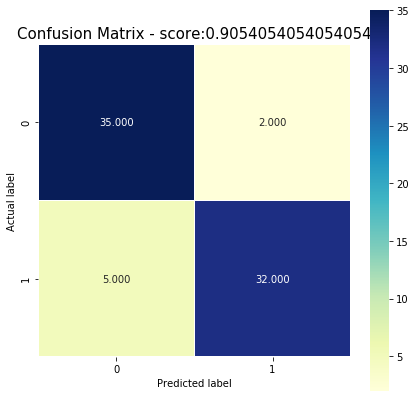

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        37
           1       0.94      0.86      0.90        37

    accuracy                           0.91        74
   macro avg       0.91      0.91      0.91        74
weighted avg       0.91      0.91      0.91        74



In [71]:
def conf_matrix(y_test,pred):
    cm = confusion_matrix(y_test,pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,pred))
    plt.title(all_sample_title, size = 15);
    plt.show()
    print(classification_report(y_test,pred))
conf_matrix(y_test,pred)

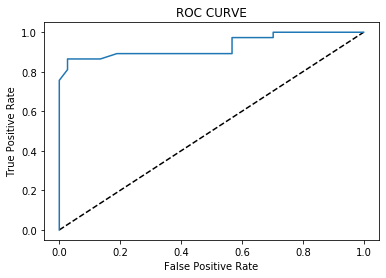

In [72]:
def plot_roc_curve(y_test,X_test,model):
    fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_mlp, tpr_mlp)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.show()
plot_roc_curve(y_test,X_test,rf)

# Data Insights

- Most of the patients are in the age between 50s to 60s. Let’s take a quick look basic stats. The mean age is about 54 years with ±9.08 std, the youngest is at 29 and the oldest is at 77. Which clearly states that a possibiity of heart diseases increases with age.


- Chest pain (cp) or angina is a type of discomfort caused when heart muscle doesn’t receive enough oxygen rich blood, which triggered discomfort in arms, shoulders, neck, etc. However, there are higher numbers of heart disease patients without chest pain and almost balance amount between typical and atypical anginal pain.


- Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient.


- As can be seen there is a pacient with high cholesterol. But, there's not a specific division between those that feel pain during exercise practice and those of not feel pain. Cholestrol is not necessarily a deciding factor.